# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


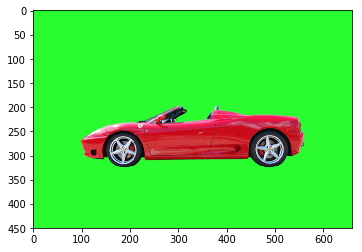

In [3]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [11]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,150,0]) 
upper_green = np.array([100,255,200])


### Create a mask

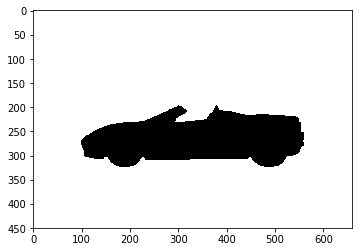

In [12]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

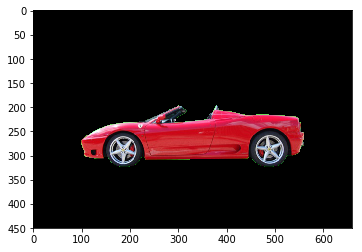

In [13]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

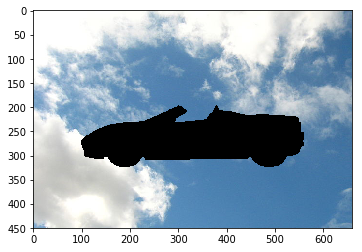

In [14]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Get height from image 
height = image.shape[0]
# Get width from image 
width = image.shape[1]
# Crop it or resize the background to be the right size
crop_background = background_image[0:height, 0:width]

# Mask the cropped background so that the car area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background and make sure 
plt.imshow(crop_background)

### Create a complete image

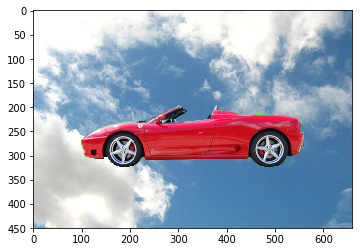

In [15]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background
plt.imshow(complete_image)